密度モデル$(\rho : r/R_s [\rm{R_\odot}], n_e : [\rm{cm^{-3}}])$

* $1-10R_\odot \rightarrow n_e(\rho) = 10\times10^8 \times (2.99\rho^{-16} + 1.55\rho^{-6}) $ (10 $\times$ Baumbach-Allen model[Allen, 1947])

($n_e(\rho) = 10^8 \times (2.99\rho^{-16} + 1.55\rho^{-6} + 0.036r^{-\frac{3}{2}}) $ ([Baumbach, 1938]) )
* $10-65R_\odot \rightarrow n_e(\rho) = 6.14 \times (\rho - 1.0)^{-2.15\pm0.11}$ [Alverez & Haddock, 1973; Bougeret et al., 1984]
* $65-215R_\odot \rightarrow n_e(\rho) = 6.14 \times (\rho/215)^{-2.10}$ [Bougeret et al., 1984]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import sympy as sp

# Baumbach-Allen model
def baumbach(rho):
    return 1e8*(2.99*rho**(-16) + 1.55*rho**(-6) + 0.036*rho**(-3/2))

# Baumbach-Allen modelを周波数に変換
def frequency(rho):
    electron = 1.60217662e-19    # 電気素量：C
    m_e = 9.10938356e-31         # 電子の質量：kg
    epsilon_0 = 8.854187817e-12  # 真空の誘電率：F/m
    
    frequency_Hz =  1/(2*np.pi)* np.sqrt(electron**2/(epsilon_0*m_e))*1e3*np.sqrt(baumbach(rho))
    frequency_MHz = frequency_Hz / 1e6
    return frequency_MHz

# # 周波数の近似式
# def frequency(rho):
#     frequency_Hz = 9e3*np.sqrt(baumbach_allen_model1(rho))
#     frequency_MHz = frequency_Hz / 1e6
#     return frequency_MHz

# rho_symbol = sp.symbols('rho')
# rhoの範囲(Baumbach-Allen modelの定義域:>1.2R, 215R = 1AU)
rho_value = np.arange(1.2, 215, 0.01)

In [2]:
frequency(2.33)

12.638299285181509

## $n_e$のプロット

In [3]:
# # 電子密度neとrhoの関係をプロット
# def plot_function_ne(rho, label):
#     fig, ax = plt.subplots(tight_layout=True, figsize=(8,6))
#     ax.set_yscale('log') # 片対数グラフ
#     ax.set_xlabel(r'$\rho [R_\odot]$', fontsize=20) # x軸：rho[Rs]
#     ax.set_ylabel(r"$n_e[\rm{cm^{-3}}]$", fontsize=20) # y軸：ne[cm^-3]
#     ax.plot(rho, baumbach(rho), label=label)
    
    
#     # Find rho values corresponding to specific frequencies using fsolve
#     #周波数のプロットから先に計算しました
#     rho_40MHz = 2.07
#     rho_15MHz = 2.87
#     rho_300kHz = 10.57
    
    
#     # Set the y-axis limits in MHz
#     ax.set_ylim(baumbach(rho_300kHz), baumbach(rho_40MHz)) # y軸の範囲を設定. 300kHzから40MHzまで
#     ax.set_xlim(1.2, rho_300kHz+0.5) # x軸の範囲を設定. 40MHzから300kHz+0.5まで
#     ax.grid()
#     ax.axhline(y=baumbach(rho_15MHz), color='gray', linestyle='--', linewidth=0.8)
#     ax.axvline(x=rho_40MHz, color='gray', linestyle='--', linewidth=0.8)
#     ax.axvline(x=rho_15MHz, color='gray', linestyle='--', linewidth=0.8)

    
    # # Plot the text on the graph
    # # 40MHzに対応する電子密度
    # ax.text(rho_40MHz-3.0, baumbach(rho_40MHz), f'{baumbach(rho_40MHz):.2e}', fontsize=18)
    # ax.text(rho_40MHz-3.0, baumbach(rho_40MHz)-7e6, r'$(40\,\rm{MHz})$', fontsize=18)
    # # 15MHzに対応する電子密度
    # ax.text(rho_40MHz-3.0, baumbach(rho_15MHz), f'{baumbach(rho_15MHz):.2e}', fontsize=18)
    # ax.text(rho_40MHz-3.0, baumbach(rho_15MHz)-1.2e6, r'$(15\,\rm{MHz})$', fontsize=18)
    # # 300kHzに対応する電子密度
    # ax.text(rho_40MHz-3.0, baumbach(rho_300kHz), f'{baumbach(rho_40MHz):.2e}', fontsize=18)
    # ax.text(rho_40MHz-3.0, baumbach(rho_300kHz)-4e2, r'$(300\,\rm{kHz})$', fontsize=18)
    # # 最小のrho
    # ax.text(1.1, baumbach(rho_300kHz)-3.8e2, r'$1.20$', fontsize=18)    
    
    
    # # Plot points on the graph
    # # 40MHz，15MHz，300kHzの電子密度をプロット
    # ax.scatter([rho_40MHz, rho_15MHz, rho_300kHz], 
    #            [baumbach(rho_40MHz), baumbach(rho_15MHz), baumbach(rho_300kHz)], 
    #            color='red', marker='o', label='Specific Frequencies')
    
    # # Plot the text on the graph for rho values
    # #40MHzに対応するrhoの値をプロット
    # ax.text(rho_40MHz, baumbach(rho_300kHz)-0.7e3, f'{rho_40MHz:.2f}', fontsize=18, color='red')
    # # 矢印を描画
    # ax.annotate('',
    #             xy=(rho_40MHz, baumbach(rho_300kHz)), xycoords='data',
    #             xytext=(rho_40MHz+0.3, baumbach(rho_300kHz)-0.5e3), textcoords='data',
    #             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red')
    #             )
    # # 15MHzに対応するrhoの値をプロット
    # ax.text(rho_15MHz-0.3, baumbach(rho_300kHz)-0.4e3, f'{rho_15MHz:.2f}', fontsize=18, color='red')
    # # 300kHzに対応するrhoの値をプロット
    # ax.text(rho_300kHz-0.3, baumbach(rho_300kHz)-0.4e3, f'{rho_300kHz:.2f}', fontsize=18, color='red')
    # ax.legend(loc='best', fontsize=18)

In [4]:
# # 電子密度の関数をプロット
# plot_function_ne(rho_value, r'Baumbach 1938')
# plt.show()

## $f_p$のプロット

In [5]:
# 周波数とrhoの関係をプロット
def plot_function_frequency(rho, function, label):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8,6))
    ax.set_yscale('log') # 片対数グラフ
    ax.set_xlabel(r'$\rho [R_\odot]$', fontsize=20)
    ax.set_ylabel(r"Frequency [MHz]", fontsize=20)
    ax.plot(rho, function, label=label, color='red', linewidth=0.5)
    
    # Find rho values corresponding to specific frequencies using fsolve
    rho_40MHz = fsolve(lambda rho: frequency(rho) - 40, x0=1.2)[0] # x0 is the initial guess for rho value 
    rho_15MHz = fsolve(lambda rho: frequency(rho) - 15, x0=1.2)[0]
    rho_14MHz = fsolve(lambda rho: frequency(rho) - 14, x0=1.2)[0]
    rho_300kHz = fsolve(lambda rho: frequency(rho) - 0.3, x0=1.2)[0]
    
    
    # Set the y-axis limits in MHz
    ax.set_ylim(300e3/1e6, 4e7/1e6)
#     ax.set_xlim(1.2, rho_300kHz+0.5)
    ax.set_xlim(1.2, 215)
    ax.grid()
    ax.axhline(y=15e6/1e6, color='blue', linestyle='--', linewidth=0.8)
    ax.axhline(y=14e6/1e6, color='orange', linestyle='--', linewidth=0.8)
    ax.axvline(x=rho_40MHz, color='gray', linestyle='--', linewidth=0.8)
    ax.axvline(x=rho_15MHz, color='blue', linestyle='--', linewidth=0.8)
    ax.axvline(x=rho_14MHz, color='orange', linestyle='--', linewidth=0.8)
    # ax.axvline(x=rho_300kHz, color='gray', linestyle='--', linewidth=0.8)
    

    # Plot the text on the graph
    ax.text(rho_40MHz-2.5, 40e6/1e6, r'$40\,\rm{MHz}$', fontsize=18, color='green')
    ax.text(rho_40MHz+10, 16e6/1e6, r'$15\,\rm{MHz}$', fontsize=18, color='blue')
    ax.text(rho_40MHz+10, 10e6/1e6, r'$14\,\rm{MHz}$', fontsize=18, color='orange')
    # ax.text(rho_40MHz-40, 3e5/1e6, r'$300\,\rm{kHz}$', fontsize=18, color='red')
    ax.text(1.2, 3e5/1e6-0.5e5/1e6, r'$1.20$', fontsize=10)
    
    
    # Plot points on the graph
    ax.scatter([rho_40MHz, rho_15MHz, rho_14MHz, rho_300kHz], [40, 15,14,  0.3], color=['green', 'blue', 'orange', 'red'], marker='o')
    
    # Plot the text on the graph for rho values
    ax.text(rho_40MHz, 1.5e5/1e6, f'{rho_40MHz:.2f}', fontsize=18, color='green')
    # 矢印を描画
    ax.annotate('',
                xy=(rho_40MHz, 300e3/1e6), xycoords='data',
                xytext=(rho_40MHz+0.35, 1.8e5/1e6), textcoords='data',
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='green'),
                )
    ax.text(rho_15MHz-0.4, 2e5/1e6, f'{rho_15MHz:.2f}', fontsize=18, color='blue')
    ax.text(rho_14MHz, 3.6e5/1e6, f'{rho_14MHz:.2f}', fontsize=18, color='orange')
    ax.annotate('',
            xy=(rho_14MHz, 300e3/1e6), xycoords='data',
            xytext=(rho_14MHz+0.3, 3.5e5/1e6), textcoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='orange'),
            )
    # ax.text(rho_300kHz-0.4, 2.4e5/1e6, f'{rho_300kHz:.2f}', fontsize=18, color='red')
    ax.legend(loc='best', fontsize=18)

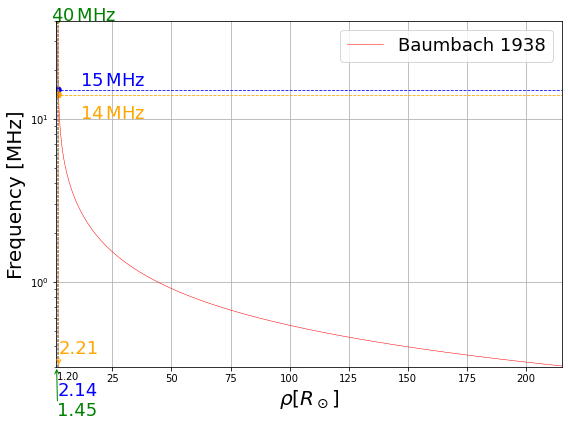

In [6]:
plot_function_frequency(rho_value, frequency(rho_value), r'Baumbach 1938')
plt.show()

## $\Delta v$の計算

読み取りmemo

2022年6月13日

- HF帯アンテナ

HF帯開始周波数：30MHz + 0.6(定規)　(＠03:24:20)

HF帯終了周波数：20MHz + 0.75(定規)　(＠03:33:00)

$\Delta t = $ 8min 40s = 520s

- Wind

Wind開始周波数：14MHz(＠03:31:00)

Wind終了周波数：1.8MHz(＠06:03:00)

$\Delta t = $ 2h 32min = 9120s

In [8]:
import numpy as np

# rho_nMHz : n MHzに対応するrhoの値を求める関数
def rho_nMHz(n):
    rho_nMHz_value = fsolve(lambda rho_value: frequency(rho_value) - n, x0=1.2)[0]
    print(f'rho_{n}MHz = {rho_nMHz_value:.2f}')
    return rho_nMHz_value




### start
# ダイナミックスペクトルを目分量で見て、startとendの周波数を決め，その周波数と時間に対応するrhoを求める
print('◎Enter the start frequency in MHz: ') # n × 10^7 Hz = n*10 MHz の部分．例：40 MHz -> 40
f_start = float(input())
print('f_start=' + str(f_start) + ' MHz')  # Convert f_start to a string using str()


# rho_start：start_frequencyに対応するrhoの値
print('rho_start =')
rho_start = rho_nMHz(f_start)

print('\n')





### end
# startと同様にendの周波数と時間に対応するrhoを求める
print('\n ◎Enter the end frequency in MHz: ')
f_end = float(input())
print('f_end=' + str(f_end) + ' MHz')  # Convert f_start to a string using str()

print('rho_end =')
rho_end = rho_nMHz(f_end)


print('\n')

# delta_rho : startとendのrhoの差
delta_rho = rho_end - rho_start
print(f'delta_rho = {delta_rho:.2f} R_\odot \n')



### delta_vを求める
# delta_f : startとendの周波数の差
delta_f = f_end - f_start
print(f'delta_f = {delta_f:.2f} MHz\n')

# delta_t : startとendの時間の差(目分量)
print('◎Enter the value of delta_t: ')
delta_t = float(input())
print(f'delta_t = {delta_t} s')

# dfdt : バースト源のドリフトレート[MHz/s]
dfdt = delta_f / delta_t
print('dfdt = ' + str(dfdt) + ' MHz/s')

# delta_v_R : バースト源の速度[R_sun/s]
delta_v_R = delta_rho / delta_t # R_\odot/s
R_sun = 696000 # km # 太陽半径 696,000 km
# delta_v_kms : バースト源の速度[km/s]
delta_v_kms = delta_v_R * R_sun # km/s 太陽半径：696,000 km
print('delta_v = ' + str(delta_v_R) + 'R_\odot /s = ' + str(delta_v_kms) + ' km/s')

print('v_b/1150=', delta_v_kms/1150)
print('1-220/v_b=', 1-220/delta_v_kms)

◎Enter the start frequency in MHz: 
f_start=100.0 MHz
rho_start =
rho_100.0MHz = 1.13



 ◎Enter the end frequency in MHz: 
f_end=10.0 MHz
rho_end =
rho_10.0MHz = 2.68


delta_rho = 1.55 R_\odot 

delta_f = -90.00 MHz

◎Enter the value of delta_t: 
delta_t = 900.0 s
dfdt = -0.1 MHz/s
delta_v = 0.0017256701145133106R_\odot /s = 1201.0663997012641 km/s
v_b/1150= 1.044405564957621
1-220/v_b= 0.8168294441883316
